In [217]:
#Варіант 4

import numpy as np
P = np.array([[0.2, 0.5, 0., 0.3],
              [0.3, 0.2, 0., 0.5],
              [0.4, 0., 0.5, 0.1],
              [0., 0.2, 0.3, 0.5]])
p0 = np.array([0.3, 0., 0.4, 0.3])
a = 8
n = 40
n0 = 4

In [218]:
#1. Знайти стаціонарний розподіл імовірностей, розв’язуючи систему рів-
#нянь (1.8) відповідно до заданого варіанта (табл.. 1.1), з огляду на умову норму-
#вання (1.3).

def method1(P):
    A = P.T - np.identity(4)
    A[3] = np.ones(4)
    b = [0, 0, 0, 1]
    return np.linalg.solve(A, b)
method1(P)

array([0.19148936, 0.21276596, 0.22340426, 0.37234043])

In [101]:
#2. Знайти стаціонарний розподіл імовірностей, використовуючи степінь матриці.
#(значення n  задане в таблиці індивідуальних завдань). 

def method2(p0, P):
    Pn = np.linalg.matrix_power(P, n)
    return np.dot(p0, Pn)
method2(p0, P)

array([0.19148936, 0.21276596, 0.22340426, 0.37234043])

In [106]:
#3. Знайти (з  точністю  ε = 10^−6)  стаціонарний  розподіл  імовірностей,  за-
#стосовуючи послідовне множення на матрицю переходу.

def method3(p0, P):
    epsilon = 1e-6
    p_prev = p0
    p_next = np.dot(p0, P)
    while np.abs(p_prev - p_next).max() > epsilon:
        p_prev = p_next
        p_next = np.dot(p_prev, P)
    return p_next

epsilon = 1e-6
p_prev = p0
p_next = np.dot(p0, P)
i = 0
print('p{} = {}, \tε = {}'.format(i, p_next, np.abs(p_prev - p_next).max()))
while np.abs(p_prev - p_next).max() > epsilon:
    i += 1
    p_prev = p_next
    p_next = np.dot(p_prev, P)
    print('p{} = {}, \tε = {}'.format(i, p_next, np.abs(p_prev - p_next).max()))

p0 = [0.22 0.21 0.29 0.28], 	ε = 0.21
p1 = [0.223 0.208 0.229 0.34 ], 	ε = 0.061
p2 = [0.1986 0.2211 0.2165 0.3638], 	ε = 0.024400000000000005
p3 = [0.19265 0.21628 0.21739 0.37368], 	ε = 0.00988
p4 = [0.19037  0.214317 0.220799 0.374514], 	ε = 0.0034089999999999954
p5 = [0.1906887 0.2129512 0.2227537 0.3736064], 	ε = 0.001954699999999976
p6 = [0.19112458 0.21265587 0.22345877 0.37276078], 	ε = 0.0008456199999999914
p7 = [0.19140519 0.21264562 0.22355762 0.37239158], 	ε = 0.00036920400000001186
p8 = [0.19149777 0.21271003 0.22349628 0.37229592], 	ε = 9.566060000004706e-05
p9 = [0.19151108 0.21275007 0.22343692 0.37230193], 	ε = 5.9366530000021234e-05
p10 = [0.191502   0.21276594 0.22340904 0.37232302], 	ε = 2.787799699999205e-05
p11 = [0.1914938  0.21276879 0.22340142 0.37233598], 	ε = 1.2965701999989587e-05
p12 = [0.19148997 0.21276785 0.22340151 0.37234067], 	ε = 4.68658370000874e-06
p13 = [0.19148895 0.21276669 0.22340295 0.3723414 ], 	ε = 1.4474874349967859e-06
p14 = [0.19148898 0.

In [219]:
#4. Порівняти результати, отримані в пп.1–3.
m1 = method1(P)
m2 = method2(p0, P)
m3 = method3(p0, P)
m = [m1, m2, m3]
print('Стаціонарний розподіл, отриманий за допомогою методу:')
for i in range(3):
    print('\t{}. {}'.format(i + 1, m[i]))
print('Норма різниці після домножування отриманого вектору на матрицю P, для методу:')
diff = [np.linalg.norm(m[i] - np.dot(m[i], P)) for i in range(3)]
for i in range(3):
    print('\t{}. {:.20f}'.format(i + 1, diff[i]))
best = np.array(diff).argmin()
print('Замый луджий медод енто {}-й!'.format(best + 1))

Стаціонарний розподіл, отриманий за допомогою методу:
	1. [0.19148936 0.21276596 0.22340426 0.37234043]
	2. [0.19148936 0.21276596 0.22340426 0.37234043]
	3. [0.19148898 0.21276609 0.2234039  0.37234103]
Норма різниці після домножування отриманого вектору на матрицю P, для методу:
	1. 0.00000000000000004807
	2. 0.00000000000000023551
	3. 0.00000059149911347205
Самый лутший метот енто 1-й!


In [202]:
#5. Повторити обчислення пп.1–3, змінивши вектор початкового розподілу 
#ймовірностей (для  цього  можна  використати  дані  попереднього  й  наступного 
#варіантів). 

p_v3 = np.array([0.2, 0.2, 0.4, 0.2]) # Початковий розподіл 3-го варіанту
p_v6 = np.array([0.3, 0.4, 0.2, 0.1]) # Початковий розподіл 6-го варіанту

m1 = method1(P)
m2 = method2(p_v3, P)
m3 = method3(p_v3, P)
m = [m1, m2, m3]
print('Стаціонарний розподіл, отриманий за допомогою методу:')
for i in range(3):
    print('\t{}. {},'.format(i + 1, m[i]))
print('при p0 = {}.\n'.format(p_v3))
m1 = method1(P)
m2 = method2(p_v6, P)
m3 = method3(p_v6, P)
m = [m1, m2, m3]
print('Стаціонарний розподіл, отриманий за допомогою методу:')
for i in range(3):
    print('\t{}. {},'.format(i + 1, m[i]))
print('при p0 = {}.'.format(p_v6))

Стаціонарний розподіл, отриманий за допомогою методу:
	1. [0.19148936 0.21276596 0.22340426 0.37234043],
	2. [0.19148936 0.21276596 0.22340426 0.37234043],
	3. [0.19148898 0.21276598 0.22340407 0.37234097],
при p0 = [0.2 0.2 0.4 0.2].

Стаціонарний розподіл, отриманий за допомогою методу:
	1. [0.19148936 0.21276596 0.22340426 0.37234043],
	2. [0.19148936 0.21276596 0.22340426 0.37234043],
	3. [0.19148946 0.21276575 0.22340461 0.37234018],
при p0 = [0.3 0.4 0.2 0.1].


In [232]:
#6. Побудувати  стохастичні  матриці  аха ,  що  відповідають  блуканням  
#частки з поглинанням і відображенням. Знайти розподіл імовірностей  p(jn) для 
#цих процесів. 

P = np.zeros([a + 1, a + 1])
P += np.diag(np.ones(a) * 0.5, 1)
P += np.diag(np.ones(a) * 0.5, -1)
P[0, 0], P[-1, -1] = 1, 1
P[0, 1], P[-1, -2] = 0, 0
P

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ]])

In [270]:
def ksi(n):
    if (n == 0) | (n == a): return n
    else:
        rand = np.random.randint(0, 2)
        if rand == 0: return n - 1
        else: return n + 1
ksi(5)

6

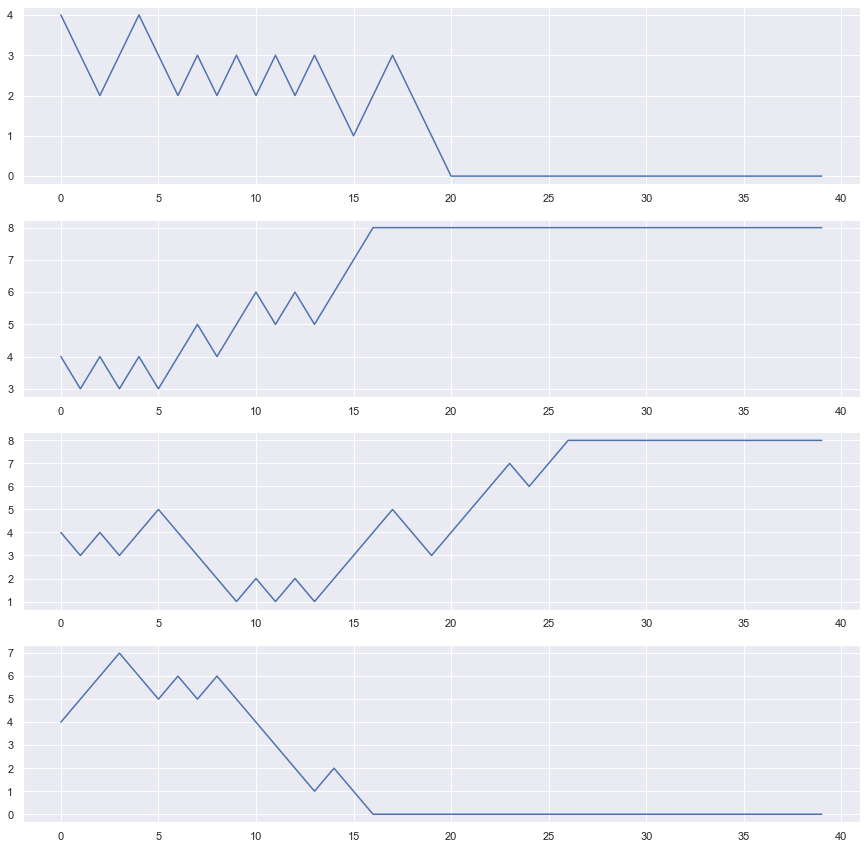

In [280]:
#7. Промоделювати блукання частки з поглинанням і відображенням (но-
#мер  стану  n0 ,  з  якого  починається  блукання  частки,  значення  а ,  n   взяти  
#з табл. 1.1). 

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


fig, ax = plt.subplots(nrows = 4, figsize=(15,15))
for axi in ax:
    x = np.arange(n)
    y = np.empty(n)
    y_curr = n0
    for i in range(n):
        y[i] = y_curr
        y_curr = ksi(y_curr)
    axi.plot(x, y)